In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.shape

(8124, 23)

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

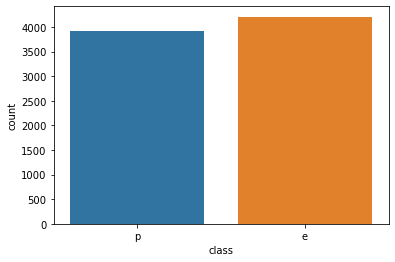

In [5]:
sns.countplot(df['class'])

<Figure size 1008x504 with 0 Axes>

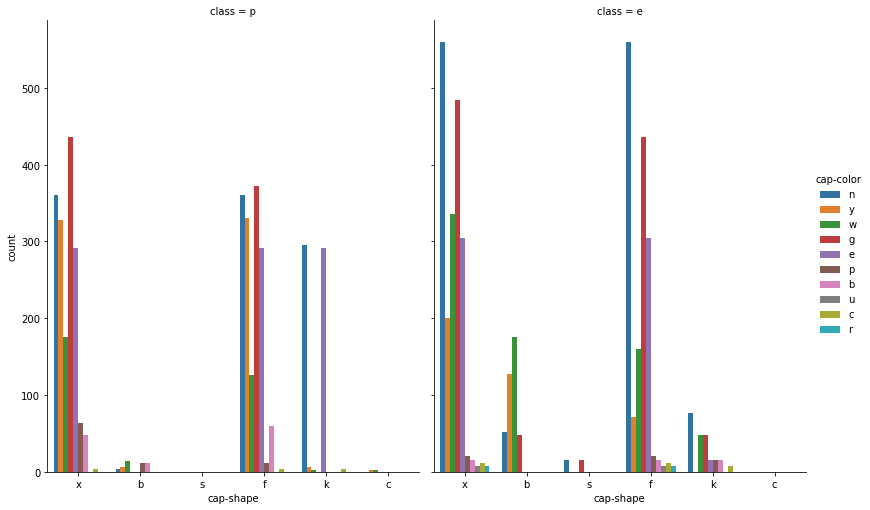

In [6]:
plt.figure(figsize=(14,7))
g= sns.catplot(x="cap-shape",hue="cap-color",col="class",
              data=df,kind="count",
              height=7, aspect=.8);

1:- White Coloured and Bell Shaped Mushrooms are highly recommended for eating.

2:- Red Coloured Knobbed Shaped Mushrooms are poisonous.

<Figure size 1008x432 with 0 Axes>

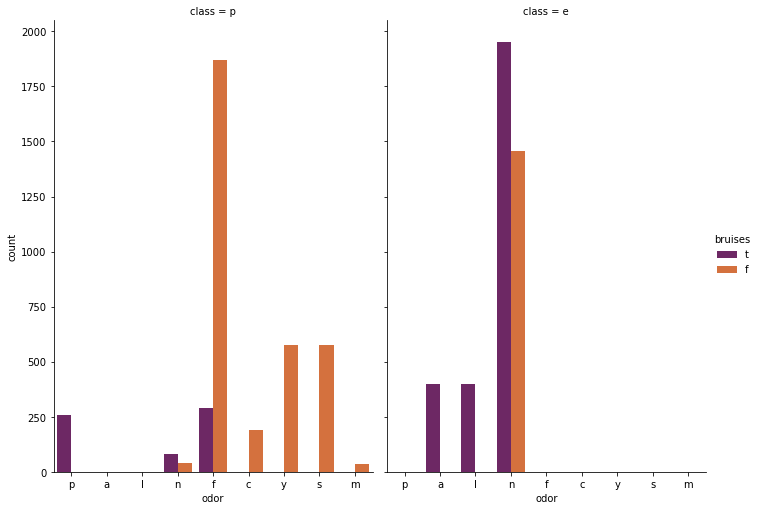

In [7]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="odor", hue="bruises", col="class",
               data=df, kind="count",
               height=7, aspect=.7,palette = "inferno")

1:- Odourless and Bruised Mushrooms are higly recommended for eating.
2:- Fishy Odour with No Bruises Mushrooms are poisonous.

# Data Preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)
df.head()      # we use head function here to check our data with the help of ".head" function.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
x = df.drop(["class"] , axis = 1)
y = df["class"]

In [10]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0)

# Decision Tree Model

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0, max_depth = 5)
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [12]:
DecisionTreeClassifier(max_depth=5, random_state=0)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [13]:
dt.score(x_train , y_train)

0.9778403095321843

In [14]:
predictions = dt.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , predictions)

0.9827727645611156

# Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)

In [17]:
rf.fit(x_train , y_train)
rf.score(x_train , y_train)

0.9910306014773127

In [18]:
predictions = rf.predict(x_test)
rf.score(x_test , y_test)

0.9913863822805579

In [19]:
accuracy_score(y_test , predictions)

0.9913863822805579

# Inference -

1. Decision Tree Accuracy - 98.2%


2. Random Forest Accuracy - 99%

Hence, Ramdom Forest is comparitively better

# Attributes

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d